Lambda =  0.1
RMSE =  0.03257767029357396


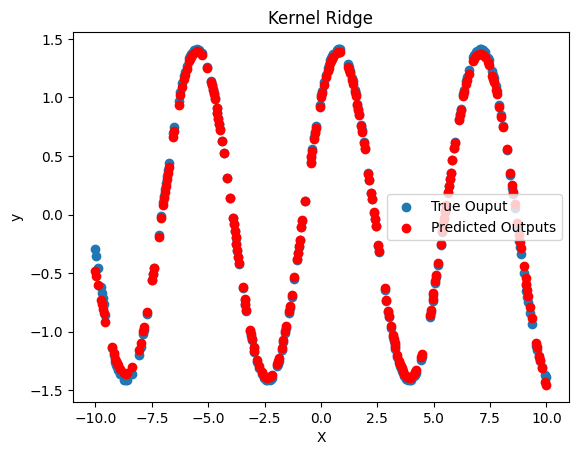

Lambda =  1.0
RMSE =  0.1703039034420253


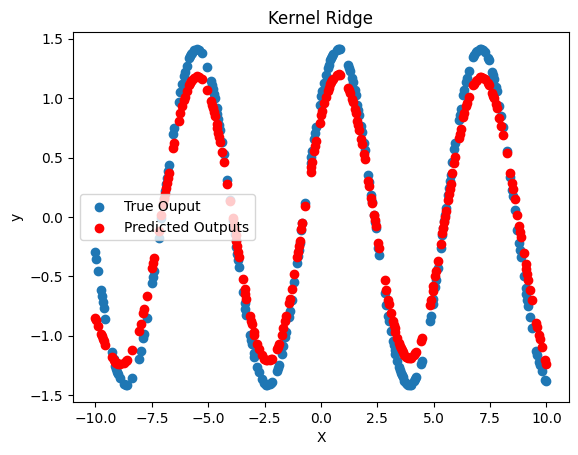

Lambda =  10.0
RMSE =  0.6092671596540066


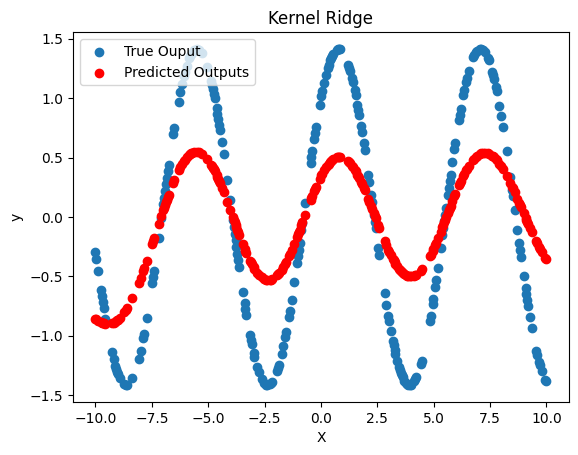

Lambda =  100.0
RMSE =  0.9110858052767243


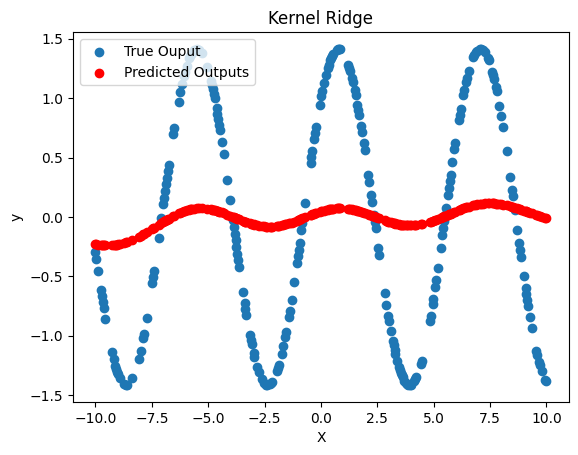

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
train_data = pd.read_fwf('/content/drive/MyDrive/data/data/ridgetrain.txt', header = None)
test_data = pd.read_fwf('/content/drive/MyDrive/data/data/ridgetest.txt', header = None)
X = train_data[0]
Y = train_data[1]
X_bias = np.c_[np.ones(X.shape[0]), X]
N = X_bias.shape[0]

gamma = 0.1

def rbf(x_t, x):
    r = pow(math.dist(x_t, x),2)
    return math.exp(-gamma*r)

K = np.zeros((N,N))
for i in range(N):
  for j in range(N):
    K[i][j] = rbf(X_bias[i],X_bias[j])

def ridge_regression(x_t, X, y, lamba):
    N = X.shape[0]
    I = np.identity(N)
    v_t = np.zeros((1,N))
    for i in range(N):
        v_t[0][i] = rbf(x_t, X[i])

    y_pred = v_t.dot(np.linalg.inv(K + lamba * I)).dot(y)
    return y_pred


X_test = test_data[0]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]
Y_test = test_data[1]
N_test = X_test_bias.shape[0]
Y_ridge = np.zeros((N_test,1))
lamba = 0.1
for k in range(4):
  lamba = 0.1*pow(10,k)
  mean_err = 0
  for i in range(N_test):
    Y_ridge[i][0] = ridge_regression(X_test_bias[i], X_bias, Y, lamba)
    mean_err += pow(Y_test[i]-Y_ridge[i][0],2)
  RMSE = math.sqrt(mean_err/N_test)
  print("Lambda = ", lamba)
  print("RMSE = ", RMSE)
  plt.scatter(X_test, Y_test, label="True Ouput")
  plt.scatter(X_test, Y_ridge, color='red', label="Predicted Outputs")
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend()
  plt.title('Kernel Ridge')
  plt.show()